# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'1613ce711dec81c21c400817d2ef2651'

## Generate Cities List

In [ ]:
pip install citipy

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

In [20]:
cities[10]

'port blair'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude

In [61]:
Latitude=[]
Temp=[]
Hum=[]
Cloud=[]
Windsp=[]
for i in range(len(cities)):
    Latitude.append("")
    Temp.append("")
    Hum.append("")
    Cloud.append("")
    Windsp.append("")
    
main_dict={'City Name':cities,
          'Latitude':Latitude,
          'Temperature (F)':Temp,
          'Humidity %':Hum,
          'Cloudiness %':Cloud,
          'Windspeed (mph)':Windsp}
main_df=pd.DataFrame(main_dict)
main_df.head()

,City Name,Latitude,Temperature (F),Humidity %,Cloudiness %,Windspeed (mph)
0,san patricio,,,,,
1,taolanaro,,,,,
2,punta arenas,,,,,
3,constitucion,,,,,
4,rocha,,,,,


In [62]:

for index,row in main_df.iterrows():
   
    base_url='https://api.openweathermap.org/data/2.5/weather?q='
    query_url=(f"{base_url}{row[0]}&APPID={api_key}&units=imperial")
    resp=requests.get(query_url).json()
    try:
        row[1]=resp['coord']['lat']
        row[2]=resp['main']['temp']
        row[3]=resp['main']['humidity']
        row[4]=resp['clouds']['all']
        row[5]=resp['wind']['speed']
    except:
        pass
    
    

In [71]:
maindf=main_df.loc[main_df["Latitude"]!='']
maindf=maindf.set_index("City Name")
maindf.head()

,Latitude,Temperature (F),Humidity %,Cloudiness %,Windspeed (mph)
City Name,,,,,
san patricio,-26.98,87.84,56,97,8.59
punta arenas,-53.16,48.09,49,40,31.09
constitucion,23.99,62.73,77,40,3.36
rocha,-34.48,73.02,52,0,4.18
praya,-8.71,78.8,83,75,5.82


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
maindf.to_csv("City Details Data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

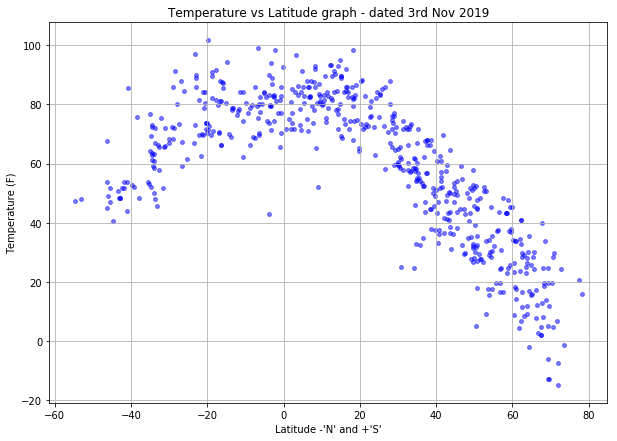

In [92]:
plt.figure(figsize=[10,7])
plt.xlabel("Latitude -'N' and +'S'")
plt.ylabel("Temperature (F)")
plt.grid()
plt.title("Temperature vs Latitude graph - dated 3rd Nov 2019")
plt.scatter(x=maindf['Latitude'],y=maindf['Temperature (F)'],s=15,c='blue',marker='o',alpha=0.5)
plt.savefig("Temperature vs Latitude graph - dated 3rd Nov 2019")

#### Latitude vs. Humidity Plot

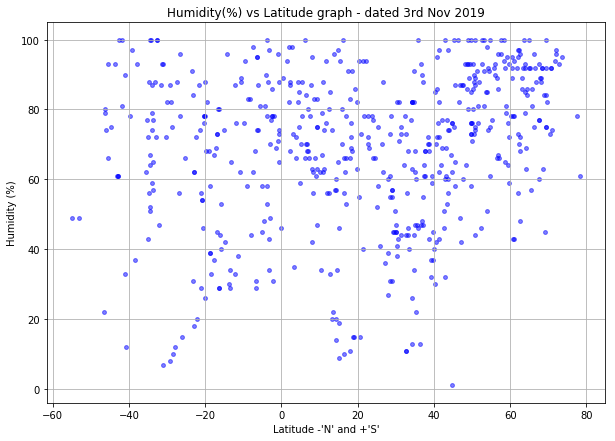

In [93]:
plt.figure(figsize=[10,7])
plt.xlabel("Latitude -'N' and +'S'")
plt.ylabel("Humidity (%)")
plt.title("Humidity(%) vs Latitude graph - dated 3rd Nov 2019")
plt.grid()
plt.scatter(x=maindf['Latitude'],y=maindf['Humidity %'],s=15,c='blue',marker='o',alpha=0.5)
plt.savefig("Humidity(%) vs Latitude graph - dated 3rd Nov 2019")

#### Latitude vs. Cloudiness Plot

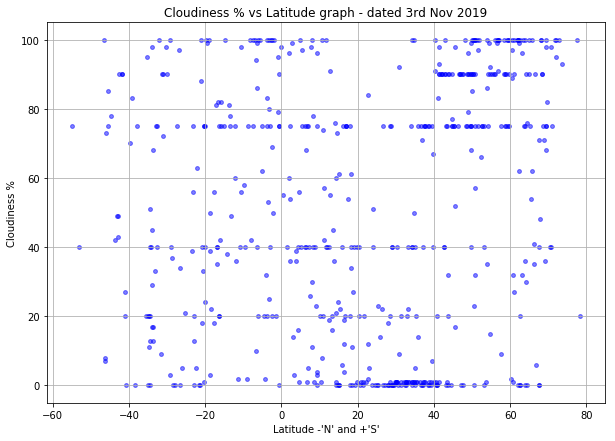

In [94]:
plt.figure(figsize=[10,7])
plt.xlabel("Latitude -'N' and +'S'")
plt.ylabel("Cloudiness %")
plt.grid()
plt.title("Cloudiness % vs Latitude graph - dated 3rd Nov 2019")
plt.scatter(x=maindf['Latitude'],y=maindf['Cloudiness %'],s=15,c='blue',marker='o',alpha=0.5)
plt.savefig("Cloudiness % vs Latitude graph - dated 3rd Nov 2019")

#### Latitude vs. Wind Speed Plot

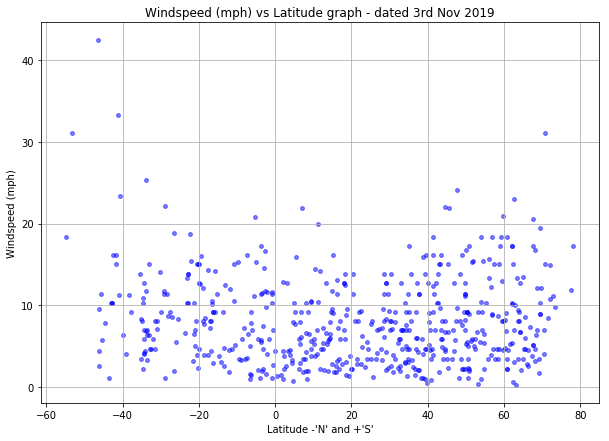

In [95]:
plt.figure(figsize=[10,7])
plt.xlabel("Latitude -'N' and +'S'")
plt.ylabel("Windspeed (mph)")
plt.grid()
plt.title("Windspeed (mph) vs Latitude graph - dated 3rd Nov 2019")
plt.scatter(x=maindf['Latitude'],y=maindf['Windspeed (mph)'],s=15,c='blue',marker='o',alpha=0.5)
plt.savefig("Windspeed (mph) vs Latitude graph - dated 3rd Nov 2019")

# Insights:
On lower and higher latitudes the temperature is lower while being the highest near the equator
Windspeed increases when going away from the equator
Cloud cover and Humidity is much lesser near the poles as compared to the other part of the earth
